# Computational Graph and Auto-grad (auto-gradient) in Pytorch

1) With a defined loss function, we need to optimize (correct) our learning parameters (such as weight and biases)

2) Computational Graph is designed to calculate the gradient

In [1]:
import numpy
import matplotlib
import torch

# 1 Simple example to calculate the gradient

1) Let's assume our function is "y = 3X^2 + 4X + 2". 

2) In a forward calculation, if we assume x = 3, substituting this into y, we get y = 41.

3) Below is the computational graph for equation above: (a) The operations are in orange color, (b) the input in blue, (c) the rest of dependant variables or number in green

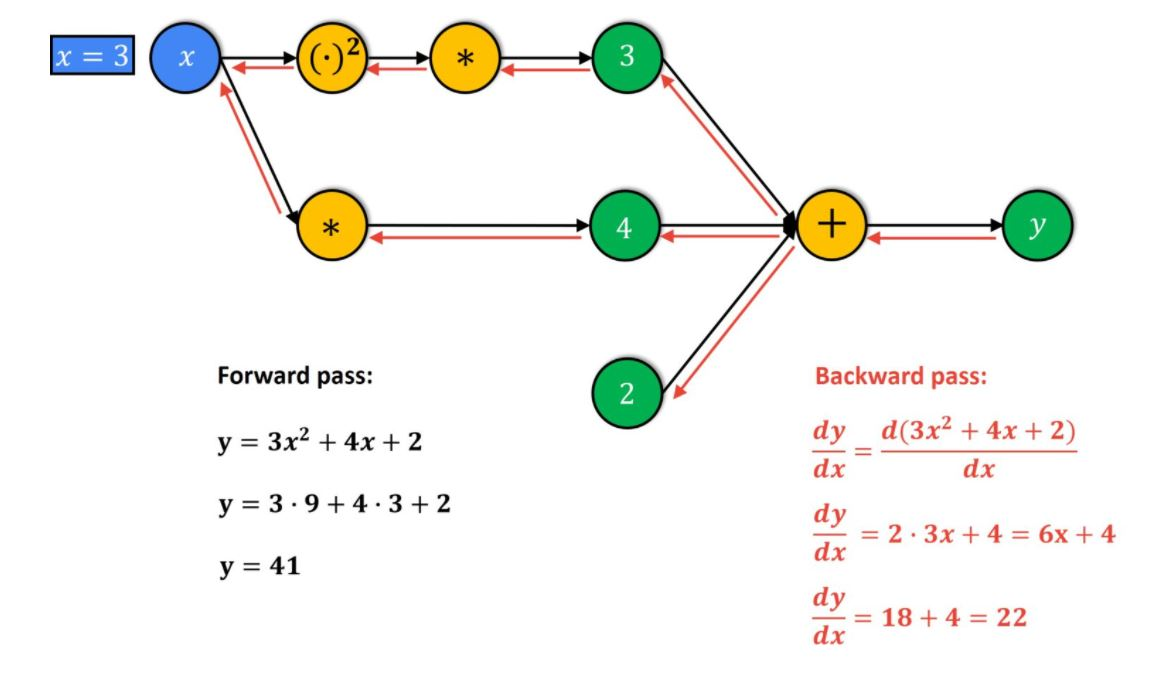

In [27]:
# since we want to calculate the gradien
x= torch.tensor(3., requires_grad=True)

In [28]:
y = 3 * x**2 + 4*x + 2

In [29]:
print(y)

tensor(41., grad_fn=<AddBackward0>)


In [30]:
# now let's calculate the derivative of y wrt x. From picture above, we know the derivative at this point is 22.

# just call the backword() method on the variable y. Since x is defined with requires_grad=True, the derivative
# will be stored in x.grad 

y.backward()
print(x.grad)

tensor(22.)


## 1-1 How to turn off the gradient calculation

In [31]:
# method 1
x = x.requires_grad_(False)
print(x)

# method 2
x = x.detach()
print(x)

tensor(3.)
tensor(3.)


# 1-2 gradient in backward propag

1) We should know that gradient is always calculated in the backwawrd propag.

2) One unique thing about PyTorch is that in an iteration, gradient will not be set zero, automatically. Therefore, if we do not set it sero at the end of iteration, it will add up

In [32]:
# example with no settign to zero

x = torch.tensor(3., requires_grad = True)

for epoch in range(3):
    y = 3*x**2 + 4*x + 2
    
    y.backward()
    
    print(x.grad)

tensor(22.)
tensor(44.)
tensor(66.)


In [33]:
# example with re-settign to zero

x = torch.tensor(3., requires_grad = True)

for epoch in range(3):
    y = 3*x**2 + 4*x + 2
    
    y.backward()
    
    print(x.grad)
    
    x.grad.zero_()

tensor(22.)
tensor(22.)
tensor(22.)


# 2 Chain Rule


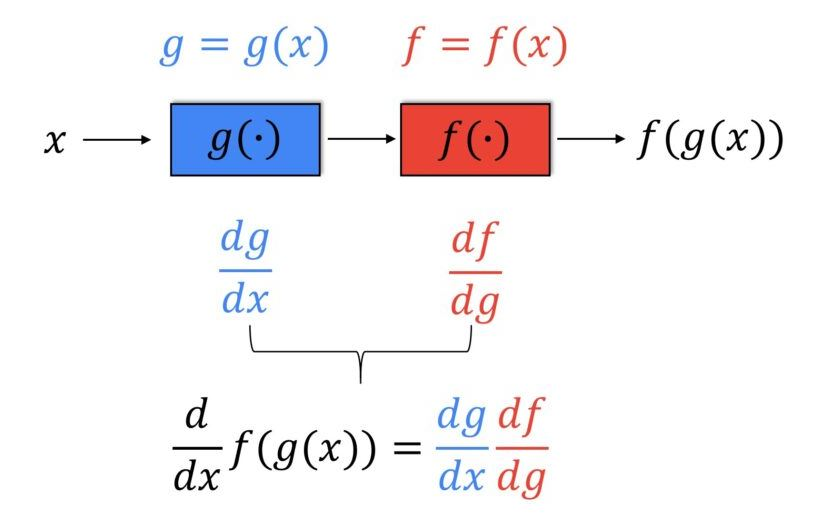

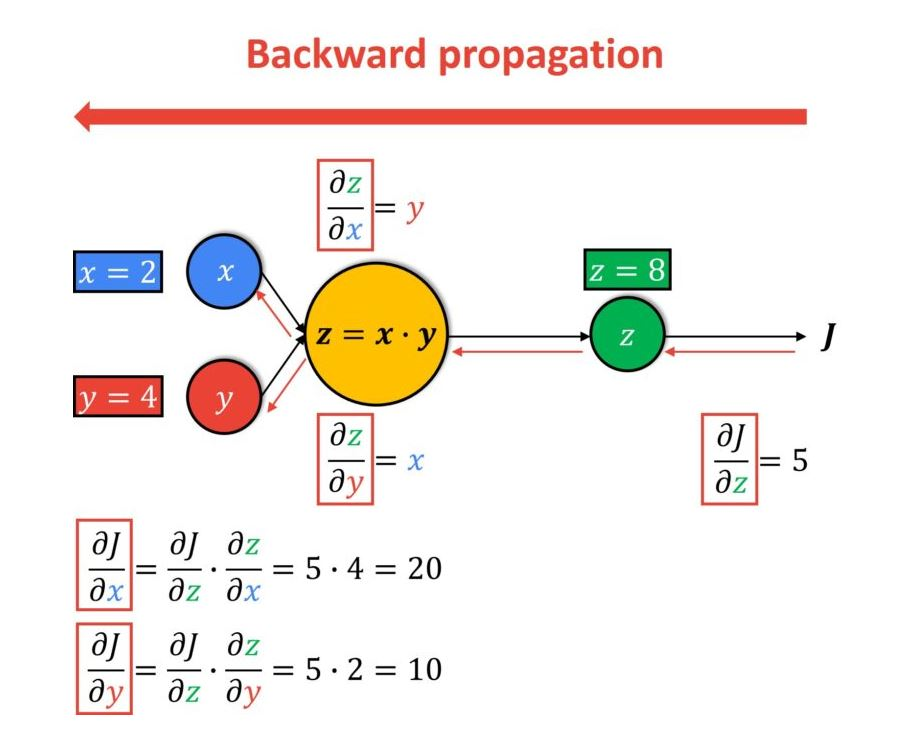

In [34]:
x = torch.tensor([1., 2., 3.], requires_grad = True)

y = x * 2 + 3

z = y**2

print(z)

tensor([25., 49., 81.], grad_fn=<PowBackward0>)


In [35]:
# To calculate the back-propagate, we need a scalar from the end to  start with
out = z.mean()

out.backward()

print(out) # print mean value

print(x.grad) # print D(out)/D(x) at eah x value

tensor(51.6667, grad_fn=<MeanBackward0>)
tensor([ 6.6667,  9.3333, 12.0000])


## 2-1 Backward() calculation, on  a vector output, rather than a scalar output

In [36]:
x = torch.tensor([1., 2., 3.], requires_grad = True)
y = x * 2 + 3
z = y**2

v = torch.tensor([1., 1., 1.])

z.backward(v)

print(x.grad)
print(x.grad / len(x))

tensor([20., 28., 36.])
tensor([ 6.6667,  9.3333, 12.0000])


# 3: Gradient of Loss wrt Weight and Bias

1) How to optimize out learning parameters. In the graph below, let's suppose the inherent leaner function that we are looking for is y = 2 *x (which of-course we do not know it at the begining).

2) We assume the input data, we have 5 values for x and 5 values for y, as our inputs: x = [1, 2, 3, 4, 5], and y= [2, 4, 6, 8 10]. The picture below only shows one value of x and y.

3) w and b are in orange and are learner parameters

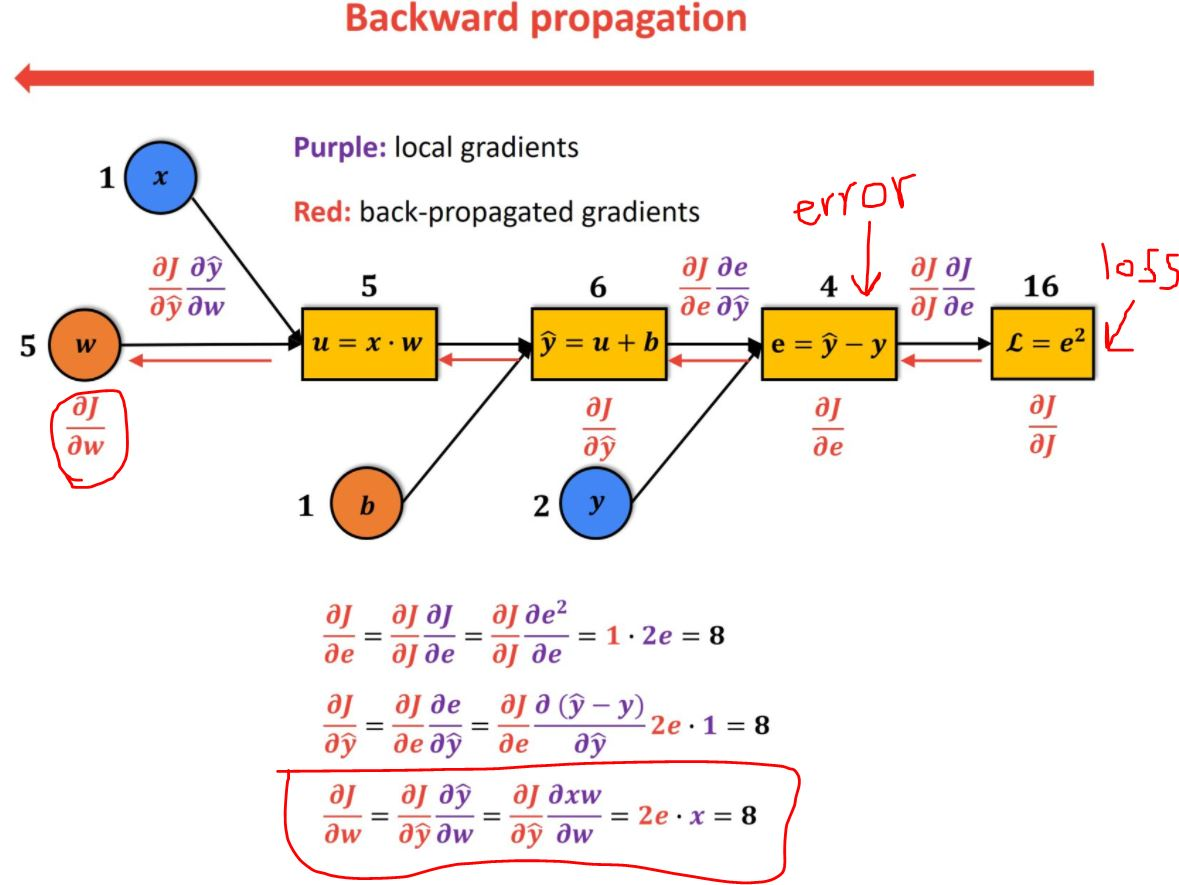

In [37]:
x = torch.tensor([1., 2., 3., 4., 5.])
y = 2 * x

In [38]:
w_grad=[]
b_grad=[]

In [39]:
# lets focus on only one value of x and y

w_ = torch.tensor(5., requires_grad = True) # initialization of w_, and to be optimized
b_ = torch.tensor(1., requires_grad = True) # initialization of b_, and to be optimized

In [40]:
for i_value in range(len(x)):
    w = torch.tensor(5., requires_grad = True) # local w
    b = torch.tensor(1., requires_grad = True) # local b
    
    y_hat = w*x[i_value] + b  # Forward calc
    
    error = y_hat - y[i_value]
    
    loss = error**2
    
    loss.backward()  # here it gives the grad at each point of 5 elements in x list, or y list
    
    learn_rate = 0.01
    
    with torch.no_grad(): # update the parameter w_ and b_
        w_ -= learn_rate * (w.grad / len(x))
        b_ -= learn_rate * (b.grad / len(x))
        
print(w_)
print(b_)

tensor(4.2800, requires_grad=True)
tensor(0.8000, requires_grad=True)
